# Первое задание. Построение кубического сплайна.
## Пацакула Никита. Группа 16132.

## Шаг 1.
### 1.1) Импортируем математические библиотеки:      
 - Модуль [**math**](https://docs.python.org/2/library/math.html) ответственен за математические функции.  
 - Модуль [**numpy**](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html) ответственен за типи данных(матрицы), которые мы дальше будем использовать.  
 - Модуль [**matplotlib.pyplot**](https://matplotlib.org/api/pyplot_api) ответственен за графический вывод.
 
### 1.2) Включаем вывод matplotlib командой:
```python
%matplotlib inline
```

In [1]:
import math
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

## Шаг 2.  
### 2.1) Реализуем функцию [метода прогонки](https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm).
 - *A = np.array(init_A)* - инициализирует массив A, идентичный поступившему на вход функции(init_A).
 - *n = A.shape[0]* - инициализируем переменную n, равный размерности A, т.е. находим размерность A.
 - *return_val* = np.zeros(shape=(n), dtype=float) - инициализируем массив решения заполненный нулями, размерностью равный входному A.
 - *for **i** in range(1,n)* - цикл, итератор которого будет целочисленно изменяться от 1 до n.
 - *for **i** in reversed(range(0, n - 1))* - цикл, итератор которого будет целочисленно изменяться от n-1 до 1.

In [2]:
def tridiagonal_matrix_algorythm(init_A, init_b):
    A = numpy.array(init_A)
    b = numpy.array(init_b)
    n = A.shape[0]
    # If dim(A) == 0 break func(t_m_a) and return 1
    if n == 0: 
        return 1
    # if dim(A) > 1
    if n > 1:
        # find the coefficient Q_1 as follows
        A[0][1] = A[0][1] / A[0][0]
    # find the coefficient Q_1 as follows
    b[0] = b[0] / A[0][0]
    for i in range(1, n - 1):
        # find Q_i coefficient
        A[i][i + 1] = A[i][i + 1] / (A[i][i] - A[i - 1][i] * A[i][i - 1])
    for i in range(1, n):
        # find common denominator((A[i][i] - A[i - 1][i] * A[i][i - 1])) and find P_i coefficient
        b[i] = (b[i] - A[i][i - 1] * b[i - 1]) / (A[i][i] - A[i - 1][i] * A[i][i - 1])
    return_val = numpy.zeros(shape=(n), dtype=float)
    return_val[n - 1] = b[n - 1]
    # method reversal
    for i in reversed(range(0, n - 1)):
        return_val[i] = b[i] - A[i][i + 1] * return_val[i + 1]
    return return_val

### 2.3) Реализуем тестовую функцию.
Данная функция получает в качестве входного значения $x$, возвращая значение $x^\frac{\cos{\frac{x}{2}}}{3} + \frac{x}{8}$ со смещением на 500.0 для наглядности.

In [3]:
def real_function(x):
    #if x > 105. :
    #    #return math.cos(x)
    #    return 500. + x**(math.cos(x / 2) / 3) + x/8
    #else :
    #    return 500
        return x / 40 * math.sin(2*x + math.pi/4)

## Шаг 3.
### 3.1) Реализуем определение значений $x_i$ , $y_i$.
 - Зададим краевые значения ($x \in [100 , 110]$ == $x \in [A,B]$):
```python
boundary_condition_A = 100.
boundary_condition_B = 110.
```
 - Задаем количество узлов:
```python
N = 2
```
 - Находим $x_i$ по формуле $x_i = A + \frac{B - A}{(N - 1)}(i + \cos(5i))$ и $y_i$ по формуле $y_i$ = real_function($x_i$) для $x \in (A,B)$:
 ```python
# len(x) equal dim(x) equal N
n = len(x)
for i in range(1, n - 1):
    x[i] = AA + (BB - AA) / (N - 1) * (i + 0. * math.cos(5. * i))
    y[i] = real_fun(x[i])
```
 - Определяем $x_0, x_n$ и $y_0, y_n$ для краевых значений A и B:
 ```python
x[0] = boundary_condition_A
x[N - 1] = boundary_condition_B
y[0] = real_fun(x[0])
y[N - 1] = real_fun(x[N - 1])
 ```

In [4]:
boundary_condition_A = 75.
boundary_condition_B = 100.
N = 20
x = numpy.zeros(shape=(N), dtype=numpy.float64(0.))
y = numpy.zeros(shape=(x.shape[0]), dtype=numpy.float64(0.))
# Achtung!
Left = 10.
Right = 10.
n = len(x)
for i in range(1, n - 1):
    x[i] = boundary_condition_A + (boundary_condition_B - boundary_condition_A) / (N - 1) * (i + 0. * math.cos(5. * i))
    y[i] = real_function(x[i])
x[0] = boundary_condition_A
x[N - 1] = boundary_condition_B
y[0] = real_function(x[0])
y[N - 1] = real_function(x[N - 1])
print(x)
print(y)

[ 75.          76.31578947  77.63157895  78.94736842  80.26315789
  81.57894737  82.89473684  84.21052632  85.52631579  86.84210526
  88.15789474  89.47368421  90.78947368  92.10526316  93.42105263
  94.73684211  96.05263158  97.36842105  98.68421053 100.        ]
[-0.02071685  0.94975434 -1.6649116   1.97281344 -1.77954013  1.11849045
 -0.14590078 -0.8958622   1.7386711  -2.15763949  2.03100072 -1.37495114
  0.34360939  0.80693686 -1.78217897  2.32457115 -2.28145503  1.6476326
 -0.57080546 -0.68255183]


## Шаг 4.
### 4.1) Определим трехдиагональную матрицу, требуемую для метода прогонки.
 - Определим матрицы A, b, h, gamma типа [float64](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html).
 - Определим значения $h_1$ и $h_{n-1}$:
 ```python
h[1] = x[1] - x[0]
h[n - 1] = x[n - 1] - x[n - 2]
```
 - Определим $h_{i + 1}$ как $h_{i + 1} = x_{i+1} - x_i$.
 - Определим $b_i$ как $6 * (\frac{y_{i + 1} - y_i}{h_{i + 1}} - \frac{y_i - y_{i-1}}{h_i})$
 - Определим элементы матрицы А:
 ```python
    A[i - 1][i - 1] = 2 * (h[i + 1] + h[i])
    A[i][i - 1] = h[i + 1]
    A[i - 1][i] = A[i][i - 1]
 ```
 - В случае, когда количество узлов более трех, добавляем элементы матрицы:
 ```python
    A[n - 3][n - 3] = 2 * (h[n - 1] + h[n - 2])
    b[n - 3] = 6 * ((y[n - 1] - y[n - 2]) / h[n - 1] - (y[n - 2] - y[n - 3]) / h[n - 2])
 ```

In [5]:
# define 'A' matrix (n-2)x(n-2) with float64-type coefficient 
A = numpy.zeros(shape=(n - 2, n - 2), dtype=numpy.float64(0.))
# define 'b' array (n-2) with float64-type coefficient 
b = numpy.zeros(shape=(n - 2), dtype=numpy.float64(0.))
# define 'h' array (n) with float64-type coefficient 
h = numpy.zeros(shape=(n), dtype=numpy.float64(0.))
# define 'gamma' array (n) with float64-type coefficient 
gamma = numpy.zeros(shape=(n), dtype=numpy.float64(0.))
h[1] = x[1] - x[0]
h[n - 1] = x[n - 1] - x[n - 2]
for i in range(1, n - 2):
    h[i + 1] = x[i + 1] - x[i]
    b[i - 1] = 6 * ((y[i + 1] - y[i]) / h[i + 1] - (y[i] - y[i - 1]) / h[i])
    A[i - 1][i - 1] = 2 * (h[i + 1] + h[i])
    A[i][i - 1] = h[i + 1]
    A[i - 1][i] = A[i][i - 1]
if n >= 3:
    A[n - 3][n - 3] = 2 * (h[n - 1] + h[n - 2])
    b[n - 3] = 6 * ((y[n - 1] - y[n - 2]) / h[n - 1] - (y[n - 2] - y[n - 3]) / h[n - 2])

### 4.2) Найдем значения $\gamma$.

In [6]:
gamma[0] = Left
gamma[n - 1] = Right
if b.shape[0] != 0:
    b[0] = b[0] - h[1] * Left
    b[n - 3] = b[n - 3] - h[n - 1]  * Right
tmp = tridiagonal_matrix_algorythm(A, b)
for i in range(1, n - 1):
    gamma[i] = tmp[i - 1]

## Шаг 5.
### 5.1) Определим значения функции.

In [7]:
def fun(inputed_x):
    if inputed_x <= x[0]:
        i = 0
        return y[i] * (x[i + 1] - inputed_x) / h[i + 1] + y[i + 1] * (inputed_x - x[i]) / h[i+1] + gamma[i] * ((x[i + 1] - inputed_x) ** 3 - (h[i + 1] ** 2) * (x[i + 1] - inputed_x)) / (6 * h[i + 1]) + gamma[i + 1] * ((inputed_x - x[i]) ** 3 - (h[i + 1] ** 2) * (inputed_x - x[i])) / (6 * h[i + 1])
    for i in range(0, n - 1):
        if (inputed_x <= x[i + 1] and inputed_x >= x[i]):
            return y[i] * (x[i + 1] - inputed_x) / h[i + 1] + y[i + 1] * (inputed_x - x[i]) / h[i+1] + gamma[i] * ((x[i + 1] - inputed_x) ** 3 - (h[i + 1] ** 2) * (x[i + 1] - inputed_x)) / (6 * h[i + 1]) + gamma[i + 1] * ((inputed_x - x[i]) ** 3 - (h[i + 1] ** 2) * (inputed_x - x[i])) / (6 * h[i + 1])

### 5.2) Определим функцию графического вывода.

In [8]:
def get_graph(inputed_x, inline_function):
    drawner = numpy.array(inputed_x)
    for i in range(0, drawner.shape[0]):
        drawner[i] = inline_function(drawx[i])
    return drawner

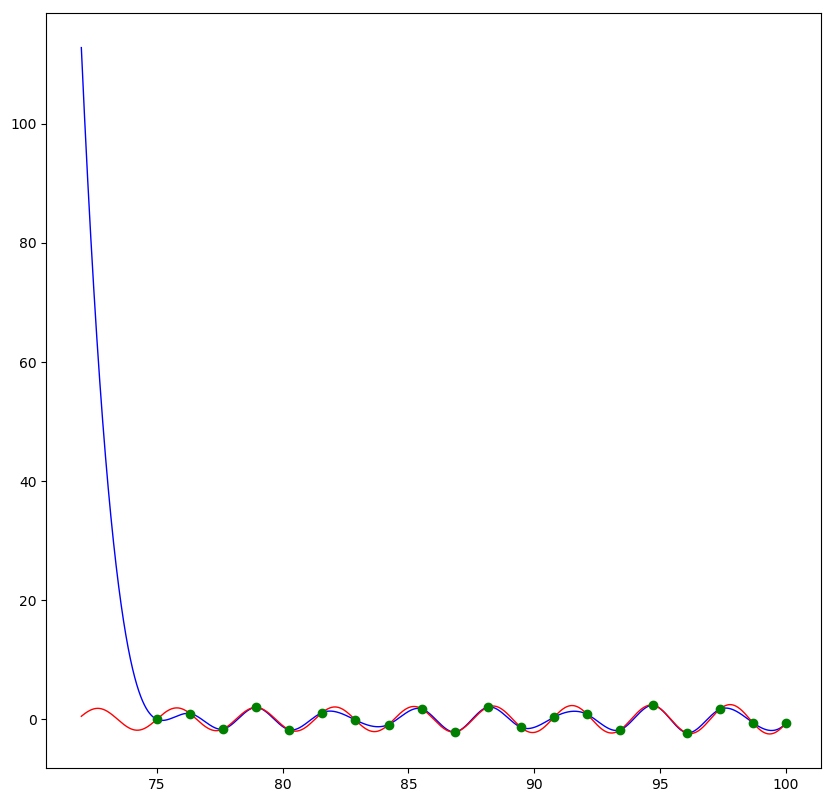

In [9]:
drawx = numpy.arange(x[0] - 3., x[n - 1], 0.001)
drawner = get_graph(drawx, fun)
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='k')
curve1, = plt.plot(drawx, drawner, 'b-', linewidth=1.)
drawner = get_graph(drawx, real_function)
curve2, = plt.plot(drawx, drawner, 'r-', linewidth=1.)
curve3, = plt.plot(x, y, 'go')
plt.show()